# Partie 1 : méthodes de gradient

Le but de cette première partie du TP est de programmer, valider et expérimenter l’algorithme du **gradient à pas fixe (GF)** et à **gradient à pas optimal (GO)**. Pour faciliter les comparaisons, les 2 variantes seront implémentées dans le même programme. Pour les expérimentations et validations, on considèrera les fonctions suivantes:

$$
J_{1}(v)=\sum_{i=1}^{i=N}\left(v_{i}-1\right)^{2}, \quad J_{2}(v)=\sum_{i=1}^{i=N}\left(v_{i}-i\right)^{2}, \quad J_{R}(v)=\sum_{i=1}^{i=N-1}\left\{\left(v_{i+1}-v_{i}^{2}\right)^{2}+\left(v_{i}-1\right)^{2}\right\}
$$

> Préciser les gradients, et les solutions optimales exactes pour ces 3 fonctions coût.

$$
\nabla J_1 (v),\quad\quad \nabla J_2 (v),\quad\quad \nabla J_R (v) ~~ ?
$$

In [8]:
import numpy as np

def J1 (v):
    N = len(v)
    ones = np.ones (N)
    return [np.dot(v-ones,v-ones), 2*(v-ones)]

def J2 (v):
    N=len(v)
    temp=np.arange(1,N+1)
    return [np.dot(v-temp,v-temp), 2*(v-temp)]

## JR Rosenbrock
def JR (v):
    N=len(v);
    J=(v[1:]-(v[:-1])**2)**2+(v[:-1]-1)**2
    grad=-4*np.multiply((v[1:]-(v[:-1])**2),v[:-1])+2*(v[:-1]-1)
    return [sum(J),np.append(grad,0)]

In [9]:
v = np.array([1,1,1])
J1(v)

[J0,G0] = J1(v)

print ('La valeur de J_1 en v={} est égale à {}'.format(v,J0))
print (r'Le gradient de J_1 en v={} est égale à {}'.format(v,G0))

La valeur de J_1 en v=[1 1 1] est égale à 0.0
Le gradient de J_1 en v=[1 1 1] est égale à [0. 0. 0.]


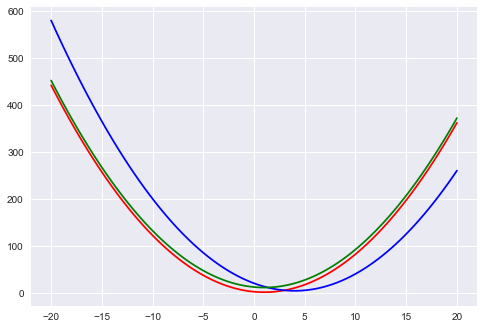

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')


x = np.linspace(-20,20,100)
v =np.array([1,2,1])

y1 = [J1(np.append (v,xi))[0] for xi in x]
y2 = [J2(np.append (v,xi))[0] for xi in x]
yR = [JR(np.append (v,xi))[0] for xi in x]

plt.plot(x,y1,color="red")
plt.plot(x,y2,color="blue")
plt.plot(x,yR,color="green")

## Etape 1.
> Rappeler les trois versions GF et GO, et identifier l’ensemble des données utilisateur, numériques, et de contrôle.

In [11]:
import numpy as np
v2=[1,1]
v=np.array([1,1])

- 
- 
- 

## Etape 2.
> Ecrire le programme GF et les modules liés (de calcul de la fonction coût et de son gradient pour les fonctions $J_1$, $J_2$, $J_R$).

**Pseudocode**

>  
- Initiaisation: $u_0 \in {\mathbb R}^n$ arbitraire et pas $\eta>0$
- Itérations: répéter pour $k=0,1,\dots$   
  - calculer le gradient $\nabla f (u_{k})$;
  - calculer $u_{k+1} = u_{k} - \eta \nabla f (u_{k})$;
- Critère d'arrêt:  $\|\nabla f (u_{k}) \| \leq \epsilon$


In [12]:
# Modifier ici le choix de fonction, J1, J2, JR, J3, J4
def cost(v):
  return JR(v)

In [21]:
N=3 ; #nombre de variables d'optimisation (ou dimension du probleme)
EPSG = 1.e-17; # tolerance sur la norme du gradient
Kmax = 1500 ; # nombre max d'iterations

# Pour le gradient à pas fixe : le pas est
eta = 0.5 ;

# First guess : u0
u0 = np.array([1,0,1])
k=1
J,grad=cost(u0)
# Iterations de descente
while J!=0 and np.linalg.norm(grad)>EPSG and k<Kmax:
    u0=u0-eta*grad
    print(eta)
    print(grad)
    print(u0)
    J,grad=cost(u0)
    k+=1


print('Convergence en : ', k , 'iterations') ;
print(u0)

0.5
[ 4 -2  0]
[-1.  1.  1.]
0.5
[-4.  0.  0.]
[1. 1. 1.]
Convergence en :  3 iterations
[1. 1. 1.]


## Etape 3.
> Effectuer les tests de validation de GF pour les fonctions $J_1$ et $J_2$ ($N = 10,20,40$) : On prendra un pas fixe $t = 1$, qu’observe t-on et pourquoi ? puis prendre $t = 0.5$.

In [28]:
## code pour J1 

In [29]:
## code pour J1 

## Etape 4.
> Construire l’approximation parabolique de la fonction $f(t) = J(u_k − t\nabla J(u_k))$, qui utilise $f(0)$, $f′(0)$ et $f(t_{k−1})$. S’en servir pour implémenter une approximation du calcul du pas optimal $t_k$. Valider GO sur les cas $J_1$ et $J_2$. Comparer ensuite GF et GO sur $J_R$ (tracer, sur le même graphique, les 2 courbes de convergence des coûts en fonction des itérations).

Etant donné $u$ et la valeur $J$ et son gradient $\nabla J$ en $u$, on propose d'approcher $J$ par un modèle quadratique au voisinage de $u$ le long du gradient $\nabla J$, soit 

$$
J(u- t G^\top ) \simeq J(u) - t G^\top G + \gamma t^2 = h(t),
$$
avec $G = \nabla J(u)$ gradient de $J$ en $u$ et $\gamma$ inconnu. En particulier, 

$$
h(0)=J(u),
\quad\quad h'(0)= - G^\top G
\quad\quad\mbox{sont deteminées}.
$$ 

Si en plus on a $h(t_{k-1})$ pour $t_{k-1}$ quelconque, on peut déduire $t_{k}$ qui minimise le modèle, 


- Trouver $t_{k}$ 


**Pseudocode**

>  
- Initiaisation: $u_0 \in {\mathbb R}^n$ arbitraire et pas $\eta_0>0$
- Itérations: Répéter pour $k=0,1,\dots$ 
  - calculer la valeur $J (u_{k})$ et le gradient de $\nabla J (u_{k})$;
  - calculer la valeur $J (v_{k})$ pour $v_k = u_k -\eta_k \nabla J (u_{k})$;
  - calculer $\eta_k^*$ optimal pour le modèle quadratique sur $[0,\eta_k]$;
  - poser 
  $$
  u_{k+1} = u_{k} - \eta_{k}^* \nabla J (u_{k}),\quad\quad\eta_{k+1} = \eta_k^*;$$
- Critère d'arrêt:  $\|\nabla J (u_{k}) \|_2 \leq \epsilon$


In [31]:
N=10 ; #nombre de variables d'optimisation (ou dimension du probleme)
EPSG = 1.e-6; # tolerance sur la norme du gradient
Kmax = 1500 ; # nombre max d'iterations

# Pour le gradient à pas fixe : le pas est
eta = 0.055 ;

# First guess : u0
u0 = np.zeros(N)
k=1
Ju,gradu=cost(u0)
# Iterations de descente
while np.linalg.norm(gradu)>EPSG and k<Kmax:
    
    vk=u0-eta*gradu
    Jvk=cost(vk)[0]
    eta=0.5*(np.dot(gradu,gradu)*eta**2)/(Jvk-Ju+eta*np.dot(gradu,gradu))
    u0=u0-eta*gradu
    
    Ju,gradu=cost(u0)
    k+=1
   


print('Convergence en : ', k , 'iterations') ;
print(u0)

Convergence en :  2 iterations
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Etape 5.
> Etudier les méthodes GF et GO sur le cas de la fonction $J_H (x, y) = (x^2 +y−2)^2 +(y^2 −2x+1)^2$ . On prendra comme guess initial $u0 = (0, 0)$ puis $u0 = (1.5, −1.5)$. Que constatez-vous ? Comment valider ce constat ?

In [33]:
def cost(v):
    return [(v[0]**2+v[1]-2)**2+(v[1]**2-2*v[0]+1)**2,[4*v[0]*(v[0]**2+v[1]-2)-4*(v[1]**2-2*v[0]+1),2*(v[0]**2+v[1]-2)+4*v[1]*(v[1]**2-2*v[0]+1)]]

In [34]:
f,fp=cost([0,0])
print(f)
print(fp)

5
[-4, -4]


# Partie 2 : méthodes de gradient conjugué
Le but de cette deuxième partie du TP est de programmer, valider et expérimenter l’algorithme du gradient conjugué GC (et sa variante Fletcher-Reeves).


## Etape 1.
> Rappeler l’algorithme GC et l’implémenter. On pourra utilement se servir comme point de départ des codes de gradient développés en Partie 1. Effectuer les tests de validation rapide pour les fonctions quadratiques suivantes ($N = 10, 20, 40$) :
$$
J_{1}(v)=\sum_{i=1}^{i=N}\left(v_{i}-1\right)^{2}, \quad J_{2}(v)=\sum_{i=1}^{i=N}\left(v_{i}-i\right)^{2}
$$



$$
J(v)=\frac{1}{2} \langle A v, v \rangle -\langle b, v\rangle; \quad\quad\quad \nabla J(v)=A v-b
$$

**Pseudocode**

>  
- Initiaisation: $u_0 \in {\mathbb R}^n$ arbitraire, $d_0 = \nabla J(u_0) \in {\mathbb R}^n$ et pas $\eta_0>0$
- Itérations: répéter pour $k=0,1,\dots$ 
  - calculer le gradient $G_k = \nabla J (u_{k})$;
  - calculer $\alpha_k$
  $$
  \alpha_k = \frac{ \langle G_k, d_{k}\rangle}{\langle A d_{k}, d_{k}\rangle};
  $$
  - poser $u_{k+1} = u_{k} - \alpha_k d_k$;
  - calculer le gradient $G_{k+1}=\nabla J (u_{k+1})$;
  - calculer $\beta_k$,
  $$
  \beta_k = \frac{ \langle G_{k+1}, Ad_{k}\rangle}{\langle A d_{k}, d_{k}\rangle};
  $$
  - poser $d_{k+1} = \nabla J(u_{k+1}) - \beta_k d_k$;
- Critère d'arrêt:  $\| d_{k} \|_2 \leq \epsilon$


In [4]:
import numpy as np
def cost(A,b,v):
    
    return [0.5*np.dot(np.dot(A,v),v)-np.dot(b,v),np.dot(A,v)-b]

In [41]:
import numpy as np
def conj(A,b):
    N=10 ; #nombre de variables d'optimisation (ou dimension du probleme)
    EPSG = 1.e-6; # tolerance sur la norme du gradient
    Kmax = 1500 ; # nombre max d'iterations

    # Pour le gradient à pas fixe : le pas est
    eta = 0.055 ;

    # First guess : u0
    uk = np.zeros(N)
    ju,gradu=cost(A,b,uk)
    dk=gradu
    # Iterations de descente
    while np.linalg.norm(gradu)>EPSG and k<Kmax:
        al=(np.dot(gradu,dk))/(np.dot(np.dot(A,dk),dk))
        uk=uk-al*dk
        ju,gradu=cost(A,b,uk)
        bk=np.dot(gradu,np.dot(A,dk))/np.dot(np.dot(A,dk),dk)
        dk=gradu-bk*dk
        k+=1



    print('Convergence en : ', k , 'iterations') ;
    print(u0)

## Etape 2.
On considère les fonctions quadratiques suivantes (en dimension $N$) : 

$$
J_3(v)= \frac 12\langle Av,v \rangle− \langle f,v \rangle , \quad\quad\quad J_4(v)= \frac 12 \langle B v,v\rangle − \langle f,v\rangle
$$
avec $f = (1,...,1)$ et les matrices $A$ et $B$ sont des matrices bande données par : 

$$
A = {\rm tridiag}[−1, 2, −1],\quad\quad\quad B = {\rm pentadiag}[−1, −1, 4, −1, −1]
$$

$$
\frac{\partial^2 J_1}{ \partial v_i \partial v_j}(p)=\left(\begin{array}{ccccc}
2 & -1 & 0 & \cdots & \\
-1 & 2 & -1 & 0 & \cdots \\
0 & -1 & 2 & -1 & \cdots \\
\cdots & \cdots & \cdots & \cdots & \cdots \\
\cdots & \cdots & \cdots & -1 & 2
\end{array}\right)
\quad\quad\quad \mbox{}  
$$


In [55]:

def J3 (v):
    n = len (v)  
    J = np.diagflat( np.ones (n-1), 1)
    A = 2*np.eye(N) - J - J.T
    #Av = 2*v 
    #Av [:-1] -=  v [1:]  
    #Av [1:]  -=  v [:-1] 
    f = np.ones(len(v)) 

    return 0.5*np.dot(Av,v) - np.dot(f,v), 

def J4 (v):
  #n = len (v) 
  #J1 = np.diagflat( np.ones (n-1), 1)
  #J2 = np.diagflat( np.ones (n-2), 2)
  #A = 4*np.eye(N) - J1 - J1.T - J2 - J2.T 

  Bv = 4*v 
  Bv [:-1] -=  v [1:]  
  Bv [1:]  -=  v [:-1]
  Bv [:-2] -=  v [2:]  
  Bv [2:]  -=  v [:-2]
  f = np.ones(len(v)) 

  return 0.5*np.dot(Bv,v) - np.dot(f,v), Bv - f 


> - Minimiser les fonctions $J_3$ et $J_4$ par GC ($N = 20,40,80,100,200$), et 
- Comparer sur ces fonctions les performances de GC et de GF (avec un pas $t = 0.5$). 
- On tracera sur un même graphique les courbes GC et GF de convergence du coût en fonction des itérations.

In [56]:

def J3 (v):
    n = len (v)  
    J = np.diagflat( np.ones (n-1), 1)
    A = 2*np.eye(N) - J - J.T
    #Av = 2*v 
    #Av [:-1] -=  v [1:]  
    #Av [1:]  -=  v [:-1] 
    f = np.ones(len(v)) 

    return 0.5*np.dot(np.dot(A,v),v) - np.dot(f,v), Av - f 

def J4 (v):
  #n = len (v) 
  #J1 = np.diagflat( np.ones (n-1), 1)
  #J2 = np.diagflat( np.ones (n-2), 2)
  #A = 4*np.eye(N) - J1 - J1.T - J2 - J2.T 

  Bv = 4*v 
  Bv [:-1] -=  v [1:]  
  Bv [1:]  -=  v [:-1]
  Bv [:-2] -=  v [2:]  
  Bv [2:]  -=  v [:-2]
  f = np.ones(len(v)) 

  return 0.5*np.dot(Bv,v) - np.dot(f,v), Bv - f 

In [60]:
import numpy as np
def cost(v):
    n = len (v)  
    b=np.ones(len(v))
    J = np.diagflat( np.ones (n-1), 1)
    A=2*np.eye(N) - J - J.T
    return [0.5*np.dot(np.dot(A,v),v)-np.dot(b,v),np.dot(A,v)-b]

In [73]:
N=4 ; #nombre de variables d'optimisation (ou dimension du probleme)
EPSG = 1.e-6; # tolerance sur la norme du gradient
Kmax = 1500 ; # nombre max d'iterations

    # Pour le gradient à pas fixe : le pas est
eta = 0.055 ;

    # First guess : u0
uk = np.zeros(N)
b=np.ones(N)
J = np.diagflat( np.ones (N-1), 1)
A=2*np.eye(N) - J - J.T
ju,gradu=cost(uk)
dk=gradu
    # Iterations de descente
while np.linalg.norm(dk)>EPSG and k<Kmax:
    a=(np.dot(gradu,dk))/(np.dot(np.dot(A,dk),dk))
    uk=uk-a*dk
    ju,gradu=cost(uk)
    bk=np.dot(gradu,np.dot(A,dk))/np.dot(np.dot(A,dk),dk)
    dk=gradu-bk*dk
    k+=1



print('Convergence en : ', k , 'iterations') ;
print(uk)

Convergence en :  21 iterations
[2. 3. 3. 2.]


In [63]:
cost(np.array([1,1,1,1] ))

[-3.0, array([ 0., -1., -1.,  0.])]

In [67]:
J = np.diagflat( np.ones (4-1), 1)
A = 2*np.eye(4) - J - J.T
v=np.ones(4)
b=np.ones(4)
np.dot(A,v)-b

array([ 0., -1., -1.,  0.])

## Etape 3.

> - Effectuer une étude du comportement de NLGC (Fletcher-Reeves à pas constant bien choisi) vis à vis du paramètre $\epsilon$ pour la fonction quadratique suivante $(N = 10, 20, 40)$ :
$$
J_{\epsilon}(v)=\sum_{i=1}^{i=N}\left(v_{i}\right)^{2}+\frac{1}{\epsilon} \sum_{i=1}^{N-1}\left\{\left(v_{i}+v_{i+1}-N / 2\right)\right\}^{2}
$$
On fera l’étude pour $\epsilon > 0$ de plus en plus petit, par exemple $\epsilon = 10^{-p}, p = 0, 1, 2, 3$. Comparer la solution optimale calculée $u^∗$ ainsi que son coût $J_\epsilon(u^∗)$ et son gradient à ceux du vecteur $c$ défini par $c_i = N/4$ $(i = 1,\dots, N)$. Interpréter les résultats obtenus.

# CECI EST UN TEST DE FLETSHER

In [72]:
#Jeps 
def Jeps(epsilon, v):
    #J : cout J=J(v))
    #G: gradient G=grad(v))

    eps= epsilon
    N=len(v)

    Jq = np.dot(v,v)
    Gq = 2*v ;

    w = np.zeros(N)
    w[:-1] = v[:-1] + v[1:] - 0.5*N

    Jnl = np.dot(w,w)
    Gnl = 2*w 
    Gnl[1:] += 2*w[:-1] 

    J = Jq + Jnl/eps ;
    G = Gq + Gnl/eps ;

    return [J,G]

In [78]:
N=10 ; #nombre de variables d'optimisation (ou dimension du probleme)
EPSG = 1.e-6; # tolerance sur la norme du gradient
Kmax = 1500 ; # nombre max d'iterations
ep=1.e-2
    # Pour le gradient à pas fixe : le pas est
eta = 0.055 ;

    # First guess : u0
uk = np.zeros(N)
jk,dradu=Jeps(ep,uk)
    # Iterations de descente
dk=gradu
while np.linalg.norm(dk)>EPSG and k<Kmax:
    vk=uk-eta*gradu
    Jvk=Jeps(ep,vk)[0]
    eta=0.5*(np.dot(gradu,gradu)*eta**2)/(Jvk-Ju+eta*np.dot(gradu,gradu))
    ukp=uk-eta*dk
    jkp,gradp=Jeps(ep,ukp)
    b=np.dot(dradp,gradp)/np.dot(gradu,gradu)
    dk=gradp+bdk
    uk=ukp
    jk,dradu=Jeps(ep,uk)
    


print('Convergence en : ', k , 'iterations') ;
print(uk)

Convergence en :  21 iterations
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


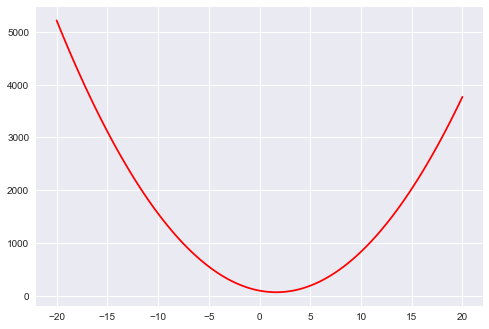

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

x = np.linspace(-20,20,100)
v = np.random.rand(3)

epsilon=0.1
y = [Jeps(epsilon,np.append (v,xi))[0] for xi in x]

plt.plot(x,y,color="red")